In [99]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [100]:
wine = load_wine()

In [101]:
wine.data.shape

(178, 13)

In [102]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [103]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [104]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [105]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [106]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)
#0.3表示30%做测试集，70%做训练集

In [107]:
Xtrain.shape

(124, 13)

In [108]:
wine.data.shape

(178, 13)

In [109]:
clf = tree.DecisionTreeClassifier(criterion="entropy")#信息熵
clf = clf.fit(Xtrain, Ytrain) #简单来说，就是求得训练集X的均值，方差，最大值，最小值这些训练集X固有的属性。
score = clf.score(Xtest, Ytest)
score
#决策树本身有随机性

0.9444444444444444

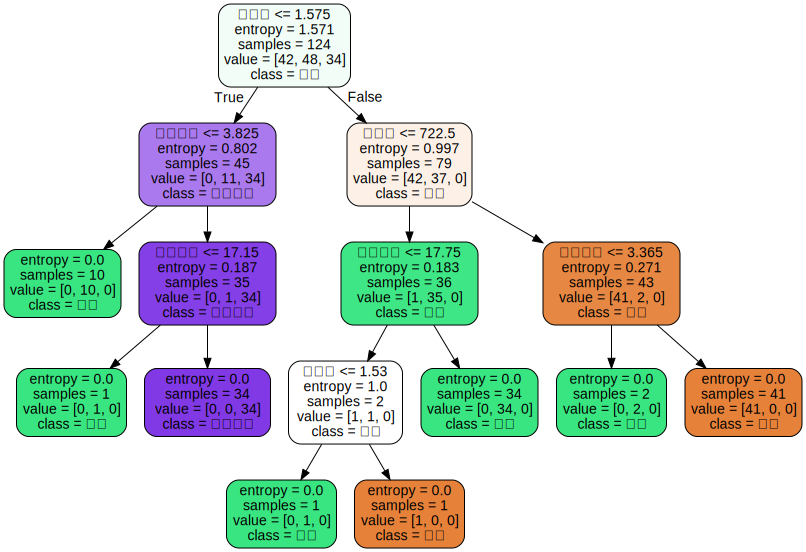

In [110]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph
#图的颜色越浅，代表此结点的不纯度越高
#samples属性统计出它应用于多少个训练样本实例。
#value属性告诉你这个节点对于每一个类别的样例有多少个。如根节点，有40个琴酒，47个雪莉，37个贝尔摩德

In [111]:
clf.feature_importances_
#属性的重要性，数值越大对建树越重要

array([0.        , 0.        , 0.        , 0.05720777, 0.        ,
       0.        , 0.41025287, 0.        , 0.01026741, 0.21163438,
       0.        , 0.        , 0.31063757])

In [112]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0572077724876978),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.410252865627671),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.010267410913466451),
 ('颜色强度', 0.21163438002132123),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.31063757094984346)]

In [113]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score
#加上参数random_state后结果不会变化

0.9444444444444444

In [114]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30
                                 ,splitter="random")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

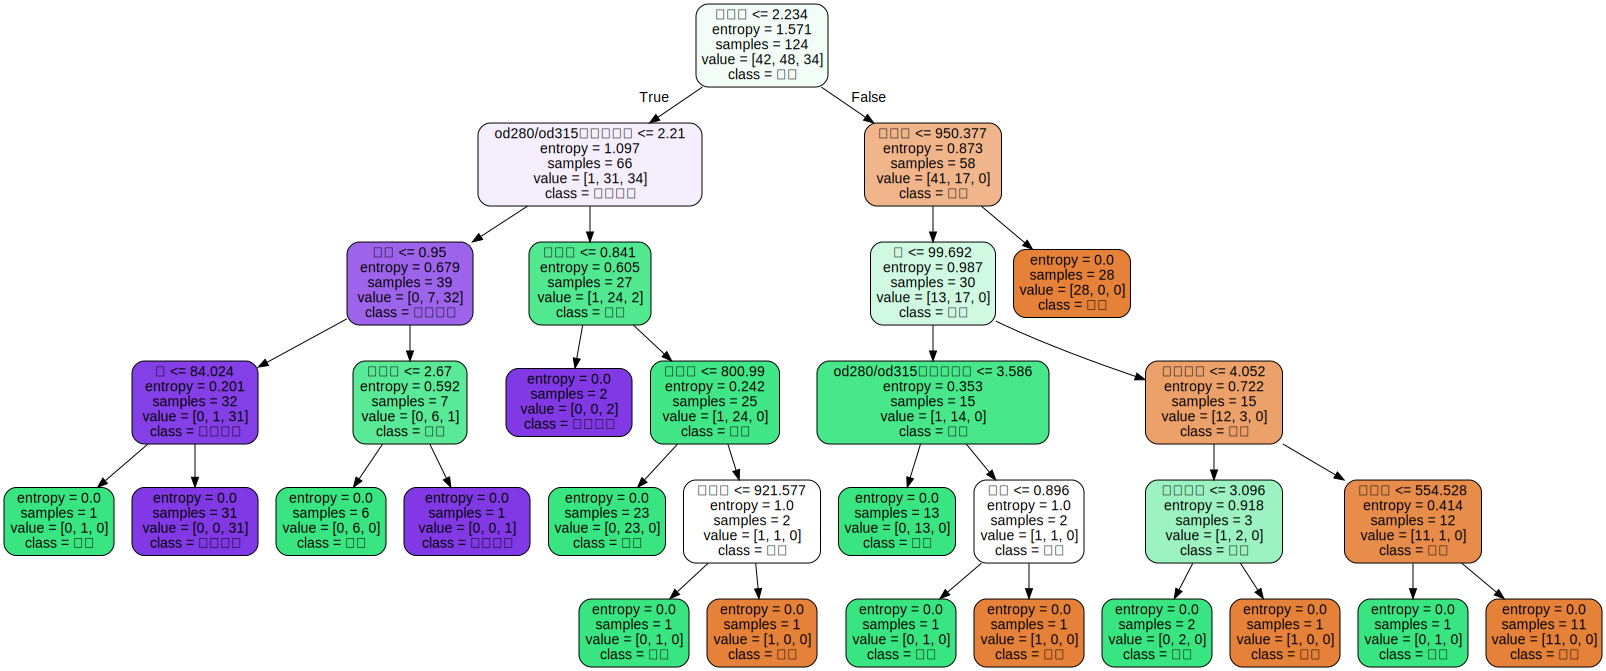

In [115]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [116]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

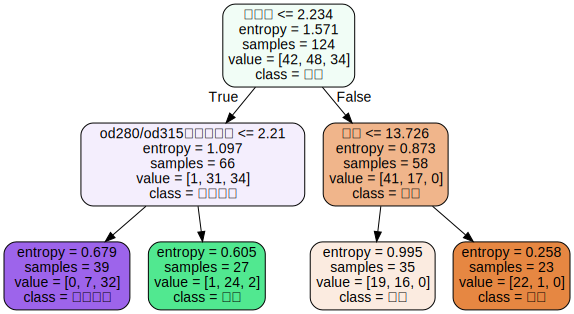

In [117]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=20
                                  ,min_samples_split=30
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [118]:
clf.score(Xtest,Ytest)

0.7962962962962963

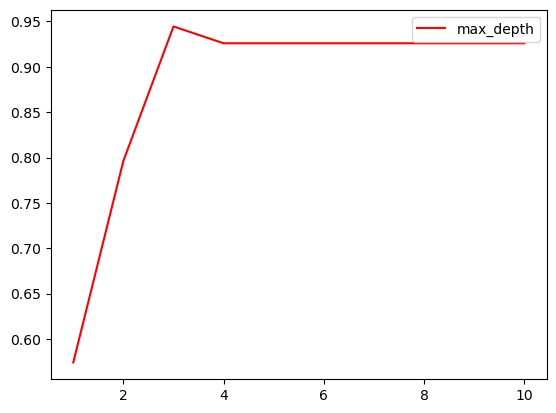

In [119]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [120]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([ 5, 12, 19, 25, 12, 30, 12, 30, 30, 12,  5, 19, 19,  5, 12, 30, 30,
       12, 30, 19, 30,  5,  5, 12, 19,  4,  5, 30,  5, 30, 12, 19,  5, 12,
        5, 30,  5, 30, 12, 19, 30, 30,  5, 30, 30,  5,  5, 30, 12,  5, 12,
        5, 30, 30], dtype=int64)

In [121]:
#predict返回每个测试样本的分类/回归结果,返回标签
clf.predict(Xtest)

array([2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0,
       0, 2, 2, 0, 1, 2, 1, 2, 0, 0])

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

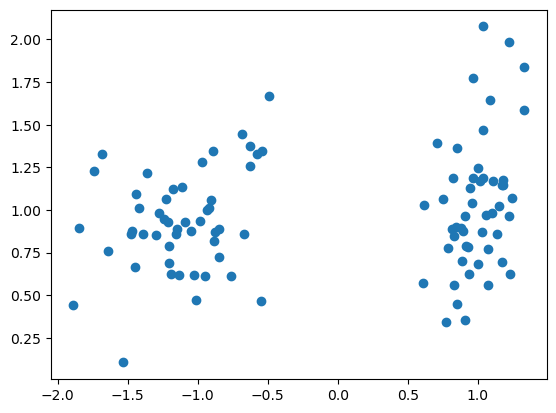

In [123]:
#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据
                           n_redundant=0, #添加冗余特征0个
                           n_informative=2, #包含信息的特征是2个
                           random_state=1, #随机模式1
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                           )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签
#也可以画出散点图来观察一下X中特征的分布
plt.scatter(X[:,0],X[:,1])

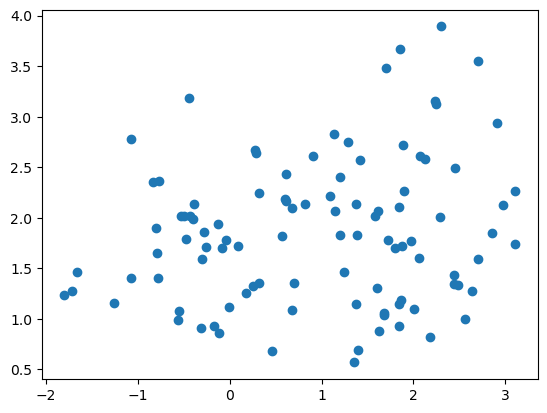

In [124]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成
#随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，
#两个簇的数据会混合在一起，分类器的效应会继续下降
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0],X[:,1])
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

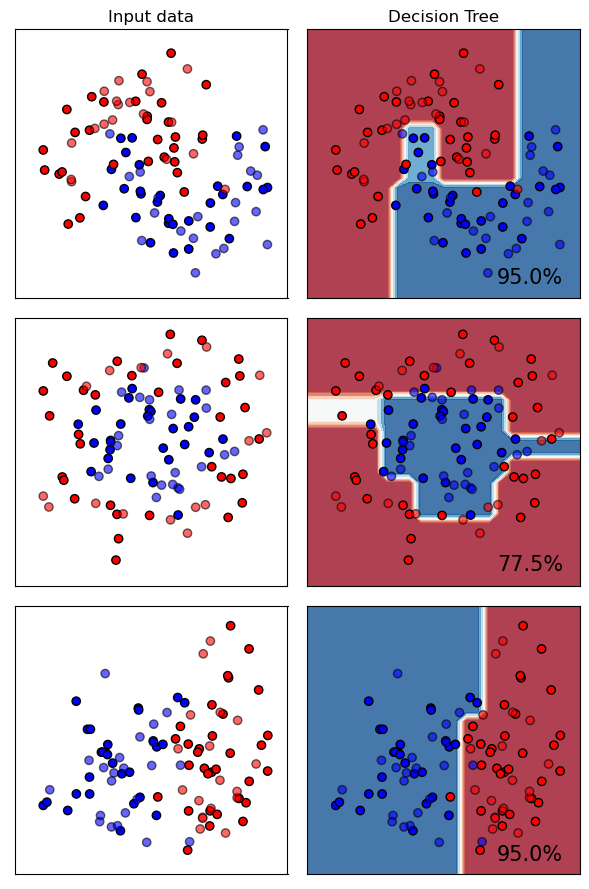

In [125]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    
    #对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
random_state=42)
    
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，
    #创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。
    #那么生成的第一个二维数组是以narray为行，m行的矩阵，
    #而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，
    #因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                                np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    
    if ds_index == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                cmap=cm_bright,edgecolors='k')
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
                cmap=cm_bright, alpha=0.6,edgecolors='k')
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    
    #######################以下为决策树模型###########################
    
    ax = plt.subplot(len(datasets),2,i)
    
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    
    ax.set_xticks(())
    ax.set_yticks(())
    
    if ds_index == 0:
        ax.set_title("Decision Tree")
        
    ax.text(array1.max() - .3,array2.min() + .3,('{:.1f}%'.format(score*100)),
            size=15,horizontalalignment='right')
        
    i += 1
    
plt.tight_layout()
plt.show()